In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
df = pd.read_csv('./dataset/label지정.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10657,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10658,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10659,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10660,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


## 데이터 윈저라이징

In [14]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)

In [15]:
# from sklearn.linear_model import LogisticRegression
# lr_clf = LogisticRegression()

# feature = df_1.drop(columns='label')
# target = df_1['label']

# lr_clf =lr_clf.fit(feature,target)
# feature_series = pd.Series(data = lr_clf.feature_importance_, index =feature.columns)
# feature_series = feature_series.sort_values(ascending=False)

# 로지스틱 회귀분석 시행

## 회귀분석을 위한 다중공선성 측정

In [16]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(df_1))

    VIF Factor          features
0   124.811874          [제조]유동비율
1   114.857002          [제조]당좌비율
2    95.763866      [제조]순운전자본회전률
3    94.936460        [제조]총자본회전률
4    75.198392       [제조]유동자산회전률
5    70.269681      [제조]유동자산구성비율
6    53.104910      [제조]자기자본구성비율
7    42.151631       [제조]노동소득분배율
8    30.688180         [제조]비유동비율
9    30.607483         [제조]자본분배율
10   27.842964       [제조]당좌자산회전률
11   26.620893          [제조]부채비율
12   23.384929       [제조]자기자본회전률
13   20.145107       [제조]순운전자본비율
14   14.572417       [제조]총자본순이익률
15   13.812358         [제조]부가가치율
16   12.900667       [제조]총자본투자효율
17   12.186725         [제조]이윤분배율
18   11.054045       [제조]매출액순이익률
19    8.712866      [제조]비유동자산회전률
20    8.077845        [제조]총자본증가율
21    7.613446      [제조]자기자본순이익률
22    6.145663      [제조]매출채권회전기간
23    4.971877      [제조]재고자산회전기간
24    4.817245       [제조]유동자산증가율
25    4.788422      [제조]총자본사업이익률
26    4.001965      [제조]매입채무회전기간
27    3.777532        [제조]자기자본배율
28    3.582709          [제조]현금비율
29    3.49

## OLS 검정

In [17]:
df_1f = df_1.drop(['label'],axis=1)

In [18]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = df_1['label']
feature = df_1f

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [19]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     23.14
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          2.57e-190
Time:                        17:03:41   Log-Likelihood:                 7612.7
No. Observations:               10662   AIC:                        -1.513e+04
Df Residuals:                   10613   BIC:                        -1.477e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0501      0.020     -2.554      0.011      -0.088      -0.012
[제조]매출액증가율        7.065e-06   3.13e-05      0.226      0.821   -5.43e-05    6.84e-05
[제조]유형자산증가율       8.259e-06   1.37e-05      0.601      0.548   -1.87e-05    3.52e-05
[제조]비유동자산증가율     -8.712e-06   3.87e-05     -0.225      0.822   -8.46e-05    6.72e-05
[제조]총자본증가율          -0.0005   9.24e-05     -5.075      0.000      -0.001      -0.000
[제조]자기자본증가율          0.0001   3.18e-05      4.575      0.000    8.31e-05       0.000
[제조]유동자산증가율       7.899e-05   5.05e-05      1.565      0.118   -1.99e-05       0.000
[제조]순이익증가율        -1.16e-06   6.65e-06     -0.174      0.861   -1.42e-05    1.19e-05
[제조]재고자산증가율      -3.359e-05   1.37e-05     -2.446      0.014   -6.05e-05   -6.67e-06
[제조]매출액총이익률       5.469e-05   7.43e-05      0.736      0.462   -9.09e-05       0.000
[제조]매출액순이익률         -0.0002   7.16e-05     -3.108      0.002      -0.000   -8.22e-05
[제조]총자본사업이익률         0.0004      0.000      1.618      0.106   -8.53e-05       0.001
[제조]총자본순이익률         -0.0010      0.000     -2.909      0.004      -0.002      -0.000
[제조]자기자본순이익률      -6.63e-05      0.000     -0.615      0.538      -0.000       0.000
[제조]1주당순이익         9.47e-06    1.6e-06      5.915      0.000    6.33e-06    1.26e-05
[제조]1주당매출액        -9.94e-08   1.04e-07     -0.956      0.339   -3.03e-07    1.04e-07
[제조]총자본회전률           0.0237      0.012      2.037      0.042       0.001       0.047
[제조]자기자본회전률         -0.0184      0.002     -7.495      0.000      -0.023      -0.014
[제조]비유동자산회전률         0.0015      0.001      1.443      0.149      -0.001       0.004
[제조]재고자산회전률       1.885e-06   4.01e-06      0.470      0.638   -5.98e-06    9.74e-06
[제조]매출채권회전률          0.0008      0.000      4.207      0.000       0.000       0.001
[제조]매입채무회전률      -6.971e-06   1.09e-05     -0.639      0.523   -2.84e-05    1.44e-05
[제조]매입채무회전기간         0.0002   5.54e-05      2.843      0.004    4.89e-05       0.000
[제조]재고자산회전기간     -6.475e-05   3.37e-05     -1.922      0.055      -0.000    1.29e-06
[제조]매출채권회전기간      9.615e-05   3.39e-05      2.836      0.005    2.97e-05       0.000
[제조]1회전기간            0.0316      0.039      0.818      0.413      -0.044       0.107
[제조]운전자본회전률          0.0013      0.003      0.497      0.619      -0.004       0.006
[제조]순운전자본회전률         0.0361      0.010      3.572      0.000       0.016       0.056
[제조]유동자산회전률         -0.0122      0.005     -2.462      0.014      -0.022      -0.002
[제조]당좌자산회전률         -0.0033      0.002     -1.566      0.117      -0.007       0.001
[제조]유동비율          7.404e-05   2.81e-05      2.638      0.008     1.9e-05       0.000
[제조]당좌비율         -4.402e-05   3.03e-05     -1.455      0.146      -0.000    1.53e-05
[제조]현금비율         -2.561e-06   1.61e-05     -0.159      0.874   -3.42e-05     2.9e-05
[제조]부채비율             0.

### 후진 제거법

In [22]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(10,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(df_1.drop(['label'],axis=1), df_1['label'])

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     49.38
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          5.90e-205
Time:                        17:04:21   Log-Likelihood:                 7600.4
No. Observations:               10662   AIC:                        -1.515e+04
Df Residuals:                   10639   BIC:                        -1.499e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0701      0.015     -4.593   

### Heatmap 제작후 확인

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


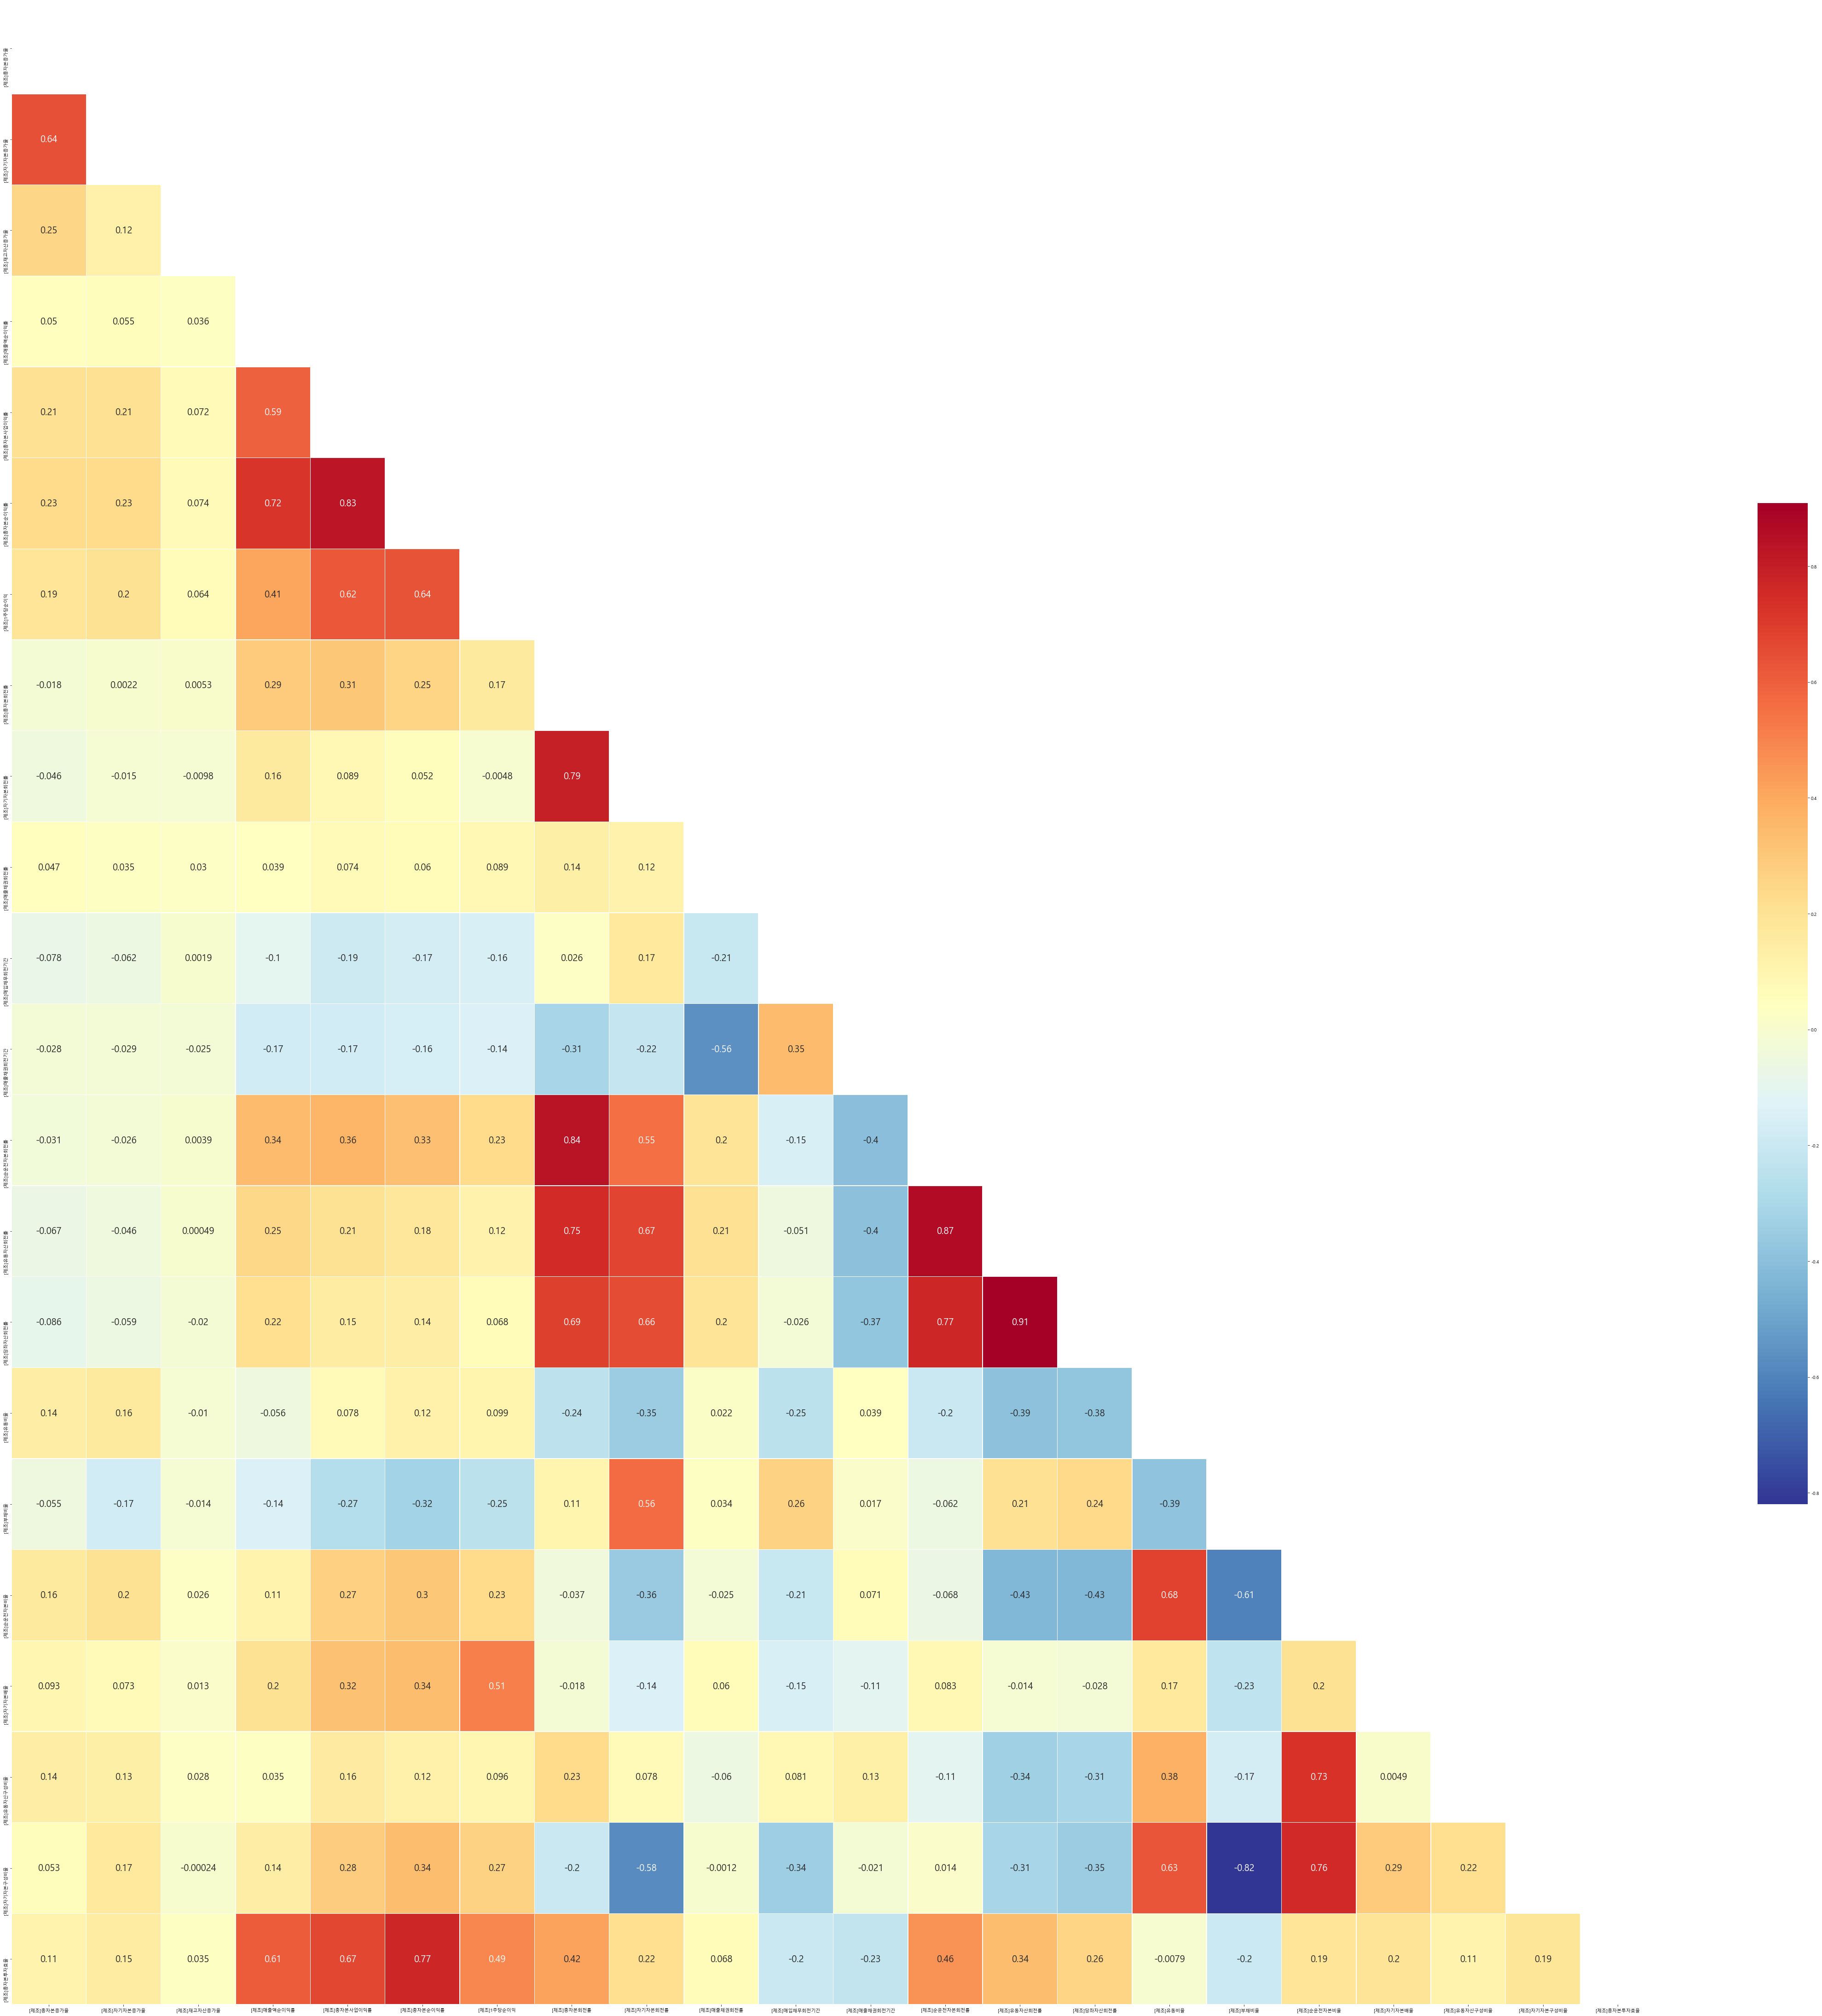

In [25]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
       '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]1주당순이익', '[제조]총자본회전률',
       '[제조]자기자본회전률', '[제조]매출채권회전률', '[제조]매입채무회전기간', '[제조]매출채권회전기간',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]부채비율',
       '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]유동자산구성비율', '[제조]자기자본구성비율',
       '[제조]총자본투자효율']])

### VIF 확인후 피처를 한번더 추출

In [29]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
       '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]1주당순이익', '[제조]총자본회전률',
       '[제조]자기자본회전률', '[제조]매출채권회전률', '[제조]매입채무회전기간', '[제조]매출채권회전기간',
       '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]부채비율',
       '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]유동자산구성비율', '[제조]자기자본구성비율',
       '[제조]총자본투자효율']])

,VIF Factor,features
0,40.573515,[제조]총자본회전률
1,39.303039,[제조]유동자산회전률
2,37.465004,[제조]유동자산구성비율
3,22.472165,[제조]자기자본구성비율
4,20.169284,[제조]자기자본회전률
5,19.136407,[제조]당좌자산회전률
6,13.472326,[제조]순운전자본비율
7,7.019032,[제조]총자본순이익률
8,6.827809,[제조]부채비율
9,6.042451,[제조]총자본투자효율


### 단계 반복
- 후진 제거 사용시 제거되는 피처 X
- VIF 점수가 모두 10 이하

-> 최종 피처 선정